In [1]:
# Imports

# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torchvision.transforms as tr
from model.change_detction_dataset import ChangeDetectionDataset, RandomFlip, RandomRot

# Models
from model.unet import Unet
from model.siamunet_conc import SiamUnet_conc
from model.siamunet_diff import SiamUnet_diff
from model.fresunet import FresUNet
from model.model import Model, ModelConfig

# Other
import numpy as np
from skimage import io

%matplotlib inline
from tqdm import tqdm as tqdm
import time
import warnings
from pprint import pprint


In [2]:
# Global Variables' Definitions
PATH_TO_DATASET = './dataset-lite/'
MODEL_TYPE = 0 # 0-FC-EF | 1-FC-Siam-diff | 2-FC-Siam-conc | 3-FresUNet
GPU_ENABLED = False
LOAD_TRAINED = False


#Cofniguration
DATA_AUG = True
BATCH_SIZE = 32
PATCH_SIDE = 96
N_EPOCHS = 50
NORMALISE_IMGS = True
TRAIN_STRIDE = int(PATCH_SIDE/2) - 1

In [3]:
# Dataset
if DATA_AUG:
    data_transform = tr.Compose([RandomFlip(), RandomRot()])
else:
    data_transform = None


train_dataset = ChangeDetectionDataset(PATH_TO_DATASET, train = True, stride = TRAIN_STRIDE, transform=data_transform)
weights = torch.FloatTensor(train_dataset.weights)
if GPU_ENABLED:
  weights = weights.cuda()
  
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 4)
test_dataset = ChangeDetectionDataset(PATH_TO_DATASET, train = False, stride = TRAIN_STRIDE)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 4)



499it [00:03, 131.91it/s]
99it [00:00, 125.16it/s]


In [4]:
# 0-FC-EF | 1-FC-Siam-diff | 2-FC-Siam-conc | 3-FresUNet
if MODEL_TYPE == 0:
    net, net_name = Unet(2*3, 2), 'FC-EF'
elif MODEL_TYPE == 1:
    net, net_name = SiamUnet_diff(3, 2), 'FC-Siam-diff'
elif MODEL_TYPE == 2:
    net, net_name = SiamUnet_conc(3, 2), 'FC-Siam-conc'
elif MODEL_TYPE == 3:
    net, net_name = FresUNet(2*3, 2), 'FresUNet'

if GPU_ENABLED:
    net.cuda()

criterion = nn.NLLLoss(weight=weights) # to be used with logsoftmax output

In [5]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of trainable parameters:', count_parameters(net))

Number of trainable parameters: 1350578


In [6]:
model_config = ModelConfig(n_epochs=N_EPOCHS, gpu_enabled=GPU_ENABLED)
model = Model(
    model=net,
    model_name=net_name,
    config=model_config,
    train_dataset=train_dataset,
    train_loader=train_loader,
    test_dataset=test_dataset,
    criterion=criterion,
)

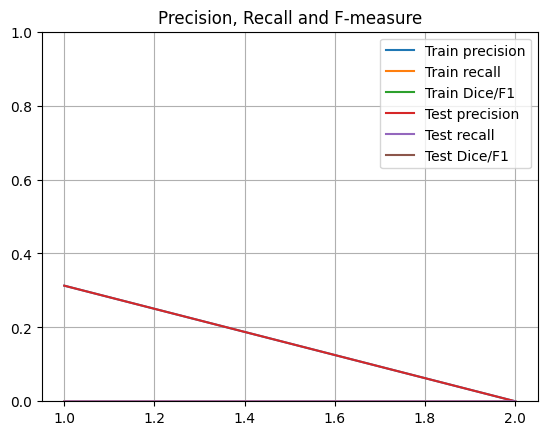

  4%|▍         | 2/50 [27:32<11:00:30, 825.63s/it]

Epoch: 3 of 50


Training: 1/ 250


Training: 2/ 250


Training: 3/ 250


Training: 4/ 250


Training: 5/ 250


Training: 6/ 250


Training: 7/ 250


Training: 8/ 250


Training: 9/ 250


Training: 10/ 250


Training: 11/ 250


Training: 12/ 250


Training: 13/ 250


Training: 14/ 250


Training: 15/ 250


Training: 16/ 250


Training: 17/ 250


Training: 18/ 250


Training: 19/ 250


Training: 20/ 250


Training: 21/ 250


Training: 22/ 250


Training: 23/ 250


Training: 24/ 250


Training: 25/ 250


Training: 26/ 250


Training: 27/ 250


Training: 28/ 250


Training: 29/ 250


Training: 30/ 250


Training: 31/ 250


Training: 32/ 250


Training: 33/ 250


Training: 34/ 250


Training: 35/ 250


Training: 36/ 250


Training: 37/ 250


Training: 38/ 250


Training: 39/ 250


Training: 40/ 250


Training: 41/ 250


Training: 42/ 250


Training: 43/ 250


Training: 44/ 250


Training: 45/ 250


Training: 46/ 250


Training: 47/ 250


Training: 48/ 250


Training: 49/ 250


Training: 50/ 250


Training: 51/ 250


Training: 52/ 250


Training: 53/ 250


Training: 54/ 250


Training: 55/ 250


Training: 56/ 250


Training: 57/ 250


Training: 58/ 250


Training: 59/ 250


Training: 60/ 250


Training: 61/ 250


Training: 62/ 250


Training: 63/ 250


Training: 64/ 250


Training: 65/ 250


Training: 66/ 250


Training: 67/ 250


Training: 68/ 250


Training: 69/ 250


Training: 70/ 250


Training: 71/ 250


Training: 72/ 250


Training: 73/ 250


Training: 74/ 250


Training: 75/ 250


Training: 76/ 250


Training: 77/ 250


Training: 78/ 250


Training: 79/ 250


Training: 80/ 250


Training: 81/ 250


Training: 82/ 250


Training: 83/ 250


Training: 84/ 250


Training: 85/ 250


Training: 86/ 250


Training: 87/ 250


Training: 88/ 250


Training: 89/ 250


Training: 90/ 250


Training: 91/ 250


Training: 92/ 250


Training: 93/ 250


Training: 94/ 250


Training: 95/ 250


Training: 96/ 250


Training: 97/ 250


Training: 98/ 250


Training: 99/ 250


Training: 100/ 250


Training: 101/ 250


Training: 102/ 250


Training: 103/ 250


Training: 104/ 250


Training: 105/ 250


Training: 106/ 250


Training: 107/ 250


Training: 108/ 250


Training: 109/ 250


Training: 110/ 250


Training: 111/ 250


Training: 112/ 250


Training: 113/ 250


Training: 114/ 250


Training: 115/ 250


Training: 116/ 250


Training: 117/ 250


Training: 118/ 250


Training: 119/ 250


Training: 120/ 250


Training: 121/ 250


Training: 122/ 250


Training: 123/ 250


Training: 124/ 250


Training: 125/ 250


Training: 126/ 250


Training: 127/ 250


Training: 128/ 250


Training: 129/ 250


Training: 130/ 250


Training: 131/ 250


Training: 132/ 250


Training: 133/ 250


Training: 134/ 250


Training: 135/ 250


Training: 136/ 250


Training: 137/ 250


Training: 138/ 250


Training: 139/ 250


Training: 140/ 250


Training: 141/ 250


Training: 142/ 250


Training: 143/ 250


Training: 144/ 250


Training: 145/ 250


Training: 146/ 250


Training: 147/ 250


Training: 148/ 250


Training: 149/ 250


Training: 150/ 250


Training: 151/ 250


Training: 152/ 250


Training: 153/ 250


Training: 154/ 250


Training: 155/ 250


Training: 156/ 250


Training: 157/ 250


Training: 158/ 250


Training: 159/ 250


Training: 160/ 250


Training: 161/ 250


Training: 162/ 250


Training: 163/ 250


Training: 164/ 250


Training: 165/ 250


Training: 166/ 250


Training: 167/ 250


Training: 168/ 250


Training: 169/ 250


Training: 170/ 250


Training: 171/ 250


Training: 172/ 250


Training: 173/ 250


Training: 174/ 250


Training: 175/ 250


Training: 176/ 250


Training: 177/ 250


Training: 178/ 250


Training: 179/ 250


Training: 180/ 250


Training: 181/ 250


Training: 182/ 250


Training: 183/ 250


Training: 184/ 250


Training: 185/ 250


Training: 186/ 250


Training: 187/ 250


Training: 188/ 250


Training: 189/ 250


Training: 190/ 250


Training: 191/ 250


Training: 192/ 250


Training: 193/ 250


Training: 194/ 250


Training: 195/ 250


Training: 196/ 250


Training: 197/ 250


Training: 198/ 250


Training: 199/ 250


Training: 200/ 250


Training: 201/ 250


Training: 202/ 250


Training: 203/ 250


Training: 204/ 250


Training: 205/ 250


Training: 206/ 250


Training: 207/ 250


Training: 208/ 250


Training: 209/ 250


Training: 210/ 250


Training: 211/ 250


Training: 212/ 250


Training: 213/ 250


Training: 214/ 250


Training: 215/ 250


Training: 216/ 250


Training: 217/ 250


Training: 218/ 250


Training: 219/ 250


Training: 220/ 250


Training: 221/ 250


Training: 222/ 250


Training: 223/ 250


Training: 224/ 250


Training: 225/ 250


Training: 226/ 250


Training: 227/ 250


Training: 228/ 250


Training: 229/ 250


Training: 230/ 250


Training: 231/ 250


Training: 232/ 250


Training: 233/ 250


Training: 234/ 250


Training: 235/ 250


Training: 236/ 250


Training: 237/ 250


Training: 238/ 250


Training: 239/ 250


Training: 240/ 250


Training: 241/ 250


Training: 242/ 250


Training: 243/ 250


Training: 244/ 250


Training: 245/ 250


Training: 246/ 250


Training: 247/ 250


Training: 248/ 250


Training: 249/ 250


Training: 250/ 250


/Users/chhaylysreng/VT/AML/change-detection/model/model.py:372: RuntimeWarning: invalid value encountered in scalar divide
  prec = tp / (tp + fp)
  4%|▍         | 2/50 [36:47<14:43:04, 1103.85s/it]


KeyboardInterrupt: 

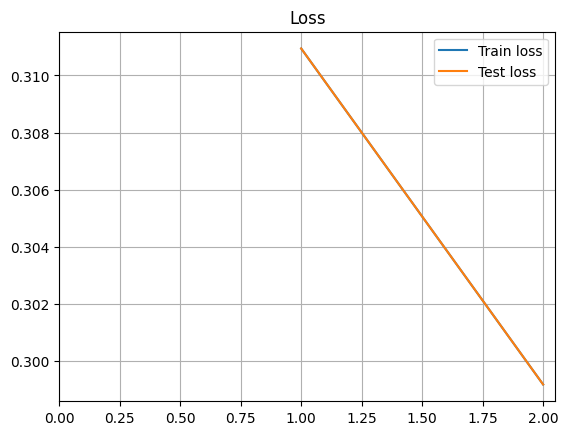

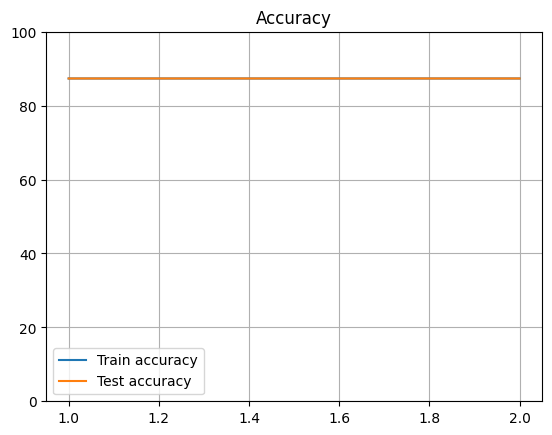

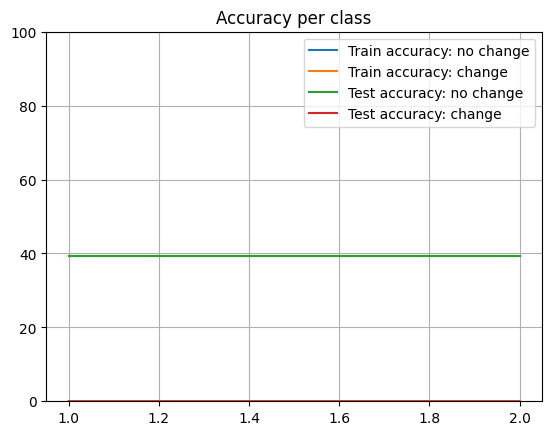

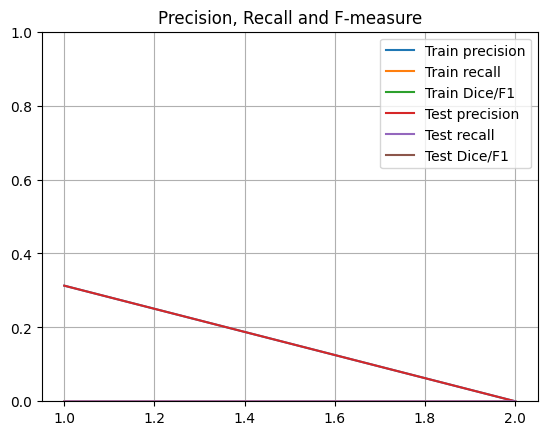

In [14]:
if LOAD_TRAINED:
    net.load_state_dict(torch.load('net_final.pth.tar'))
    print('LOAD OK')
else:
    t_start = time.time()
    out_dic = model.train()
    t_end = time.time()
    print(out_dic)
    print('Elapsed time:')
    print(t_end - t_start)

In [ ]:
if not LOAD_TRAINED:
    torch.save(model.model.state_dict(), 'net_final.pth.tar')
    print('SAVE OK')

In [ ]:
# Test
def save_test_results(dset):
    for idx, name in tqdm(dset.names.iterrows()):
        name = name[0]
        with warnings.catch_warnings():
            I1, I2, cm = dset.get_img(name)
            I1 = Variable(torch.unsqueeze(I1, 0).float())
            I2 = Variable(torch.unsqueeze(I2, 0).float())

            if GPU_ENABLED:
                I1 = I1.cuda()
                I2 = I2.cuda()

            out = net(I1, I2)
            _, predicted = torch.max(out.data, 1)
            I = np.stack((255*cm,255*np.squeeze(predicted.cpu().numpy()),255*cm),2)
            io.imsave(f'{net_name}-{name}.png',I)

t_start = time.time()
save_test_results(test_dataset)
t_end = time.time()
print('Elapsed time: {}'.format(t_end - t_start))


0it [00:00, ?it/s]/var/folders/t6/ntsczqdj1036typ96jgly34m0000gn/T/ipykernel_63371/3708903272.py:17: UserWarning: FC-Siam-diff-test00001.png.png is a low contrast image
  io.imsave(f'{net_name}-{name}.png',I)
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
1it [00:00,  5.72it/s]/var/folders/t6/ntsczqdj1036typ96jgly34m0000gn/T/ipykernel_63371/3708903272.py:17: UserWarning: FC-Siam-diff-test00002.png.png is a low contrast image
  io.imsave(f'{net_name}-{name}.png',I)
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
2it [00:00,  5.65it/s]/var/folders/t6/ntsczqdj1036typ96jgly34m0000gn/T/ipykernel_63371/3708903272.py:17: UserWarning: FC-Siam-diff-test00003.png.png is a low contrast image
  io.imsave(f'{net_name}-{name}.png',I)
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
3it [00:

Elapsed time: 14.39257001876831


In [ ]:
results = model.evaluate(test_dataset)
pprint(results)

99it [00:46,  2.15it/s]

{'class_accuracy': [99.84994506835938, 8.30510139465332],
 'dice': 0.15231818204792544,
 'kappa': 0.12803698515105952,
 'net_accuracy': 84.49031945430872,
 'net_loss': 0.3434380292892456,
 'precision': 0.9177545426860217,
 'recall': 0.08305100938466853}


In [12]:
pprint(results)

{'class_accuracy': [99.84994506835938, 8.30510139465332],
 'dice': 0.15231818204792544,
 'kappa': 0.12803698515105952,
 'net_accuracy': 84.49031945430872,
 'net_loss': 0.3434380292892456,
 'precision': 0.9177545426860217,
 'recall': 0.08305100938466853}
